In [234]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [235]:
# reading the input file

housing = pd.read_csv("/Users/sudheendragogi/AI_ML/ML/Housing_Assignment/train.csv")

housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [236]:
housing.shape

(1460, 81)

In [237]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [238]:
# count nulls in data

round(housing.isnull().sum()/len(housing.index)*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

In [239]:
# drop columns that has high missing values

housing.drop(['Alley','PoolQC','MiscFeature'],axis=1,inplace = True)

housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,NaN,0,12,2008,WD,Normal,250000


In [240]:
# count the number of nulls 

round(housing.isnull().sum()/len(housing.index)*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 78, dtype: float64

<AxesSubplot:>

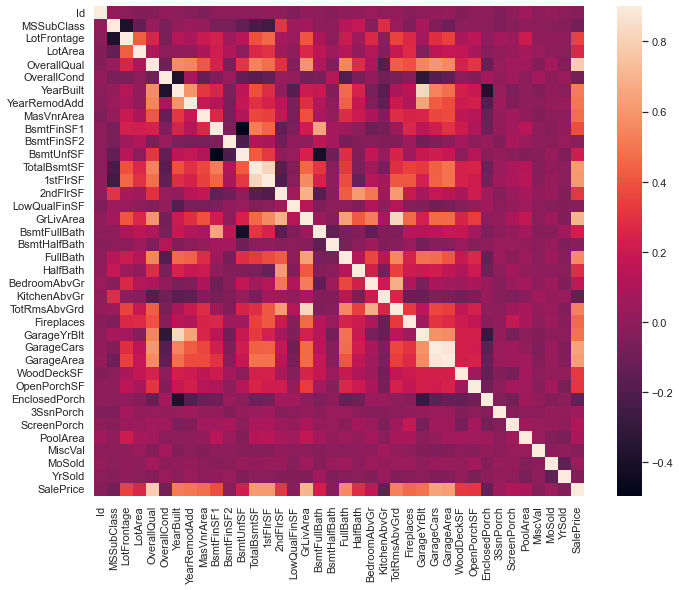

In [241]:
#Correlation map to see how features are correlated with target SalePrice
corrmat = housing.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)


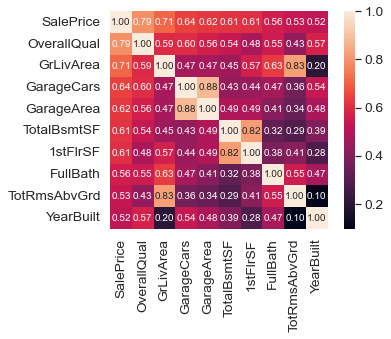

In [242]:
#find most corelated values
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

 Likely below features affect target
 
  OverallQual - good quality house would fetch bigger price
- Grlivarea -  more the areas above the ground floor, greater is the price
- Garage cars, garage area, total basement SF, 1st floor SF  

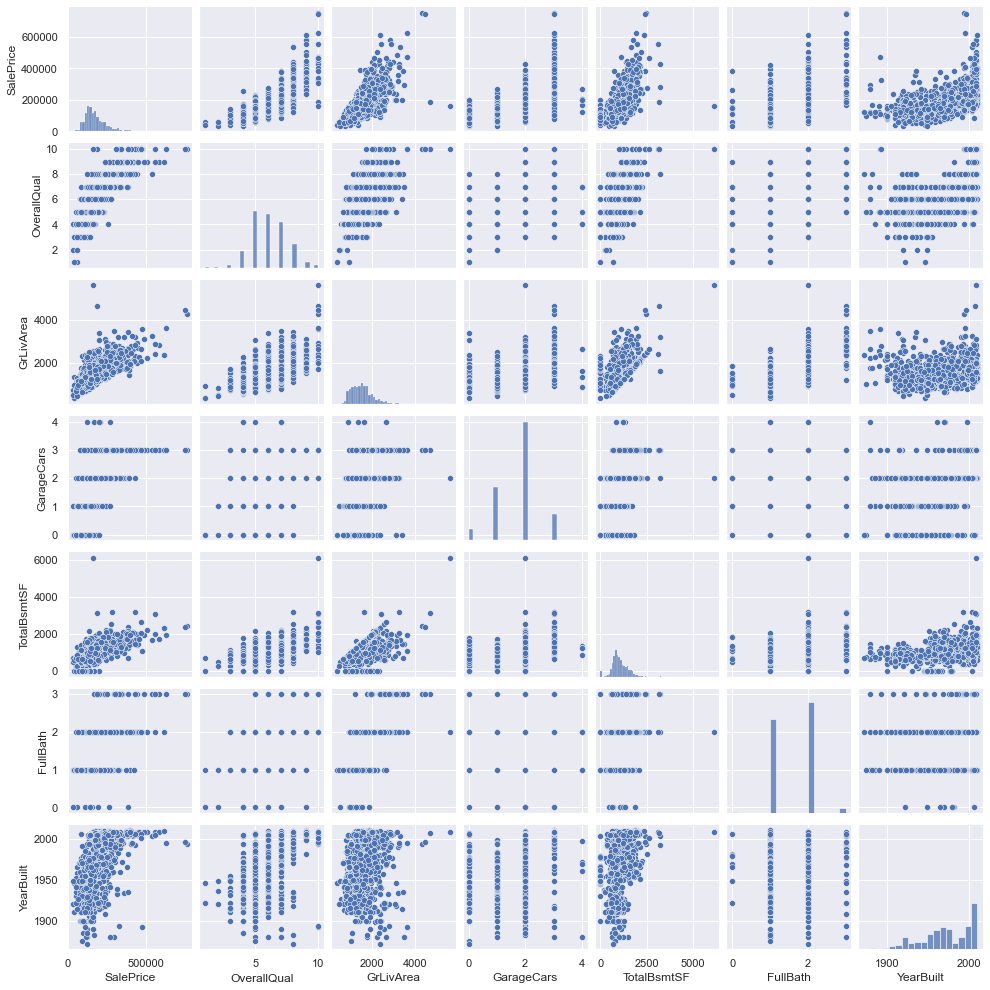

In [243]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(housing[cols],height = 2)
plt.show()

In [244]:
#treat outliers

total = housing.isnull().sum().sort_values(ascending=False)
percent = (housing.isnull().sum()/housing.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(100)

,Total,Percent
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageType,81,0.055479
...,...,...
TotalBsmtSF,0,0.000000
Heating,0,0.000000
MSSubClass,0,0.000000
CentralAir,0,0.000000


In [245]:
#drop fence as it has hig percentage of nuls

housing['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [246]:
housing.drop(['Fence'],axis=1,inplace = True)

In [247]:
housing['FireplaceQu'].value_counts()/len(housing['FireplaceQu'])*100

Gd    26.027397
TA    21.438356
Fa     2.260274
Ex     1.643836
Po     1.369863
Name: FireplaceQu, dtype: float64

In [248]:
housing['LotFrontage'].value_counts()/len(housing['LotFrontage'])*100

60.0     9.794521
70.0     4.794521
80.0     4.726027
50.0     3.904110
75.0     3.630137
           ...   
137.0    0.068493
141.0    0.068493
38.0     0.068493
140.0    0.068493
46.0     0.068493
Name: LotFrontage, Length: 110, dtype: float64

In [249]:
housing['GarageCond'].value_counts()/len(housing['GarageCond'])*100

TA    90.821918
Fa     2.397260
Gd     0.616438
Po     0.479452
Ex     0.136986
Name: GarageCond, dtype: float64

In [250]:

housing['GarageType'].value_counts()/len(housing['GarageType'])*100

Attchd     59.589041
Detchd     26.506849
BuiltIn     6.027397
Basment     1.301370
CarPort     0.616438
2Types      0.410959
Name: GarageType, dtype: float64

In [251]:
housing['GarageYrBlt'].value_counts()/len(housing['GarageYrBlt'])*100

2005.0    4.452055
2006.0    4.041096
2004.0    3.630137
2003.0    3.424658
2007.0    3.356164
            ...   
1927.0    0.068493
1900.0    0.068493
1906.0    0.068493
1908.0    0.068493
1933.0    0.068493
Name: GarageYrBlt, Length: 97, dtype: float64

In [252]:
housing['GarageFinish'].value_counts()/len(housing['GarageFinish'])*100

Unf    41.438356
RFn    28.904110
Fin    24.109589
Name: GarageFinish, dtype: float64

In [253]:
housing['GarageQual'].value_counts()/len(housing['GarageQual'])*100

TA    89.794521
Fa     3.287671
Gd     0.958904
Ex     0.205479
Po     0.205479
Name: GarageQual, dtype: float64

In [254]:

housing['BsmtExposure'].value_counts()/len(housing['BsmtExposure'])*100

No    65.273973
Av    15.136986
Gd     9.178082
Mn     7.808219
Name: BsmtExposure, dtype: float64

In [255]:
housing['BsmtFinType2'].value_counts()/len(housing['BsmtFinType2'])*100

Unf    86.027397
Rec     3.698630
LwQ     3.150685
BLQ     2.260274
ALQ     1.301370
GLQ     0.958904
Name: BsmtFinType2, dtype: float64

In [256]:
housing['BsmtFinType1'].value_counts()/len(housing['BsmtFinType1'])*100

Unf    29.452055
GLQ    28.630137
ALQ    15.068493
BLQ    10.136986
Rec     9.109589
LwQ     5.068493
Name: BsmtFinType1, dtype: float64

In [257]:

housing['BsmtCond'].value_counts()/len(housing['BsmtCond'])*100

TA    89.794521
Gd     4.452055
Fa     3.082192
Po     0.136986
Name: BsmtCond, dtype: float64

In [258]:
housing['BsmtQual'].value_counts()/len(housing['BsmtQual'])*100

TA    44.452055
Gd    42.328767
Ex     8.287671
Fa     2.397260
Name: BsmtQual, dtype: float64

In [259]:
housing['BsmtQual'].value_counts()/len(housing['BsmtQual'])*100

TA    44.452055
Gd    42.328767
Ex     8.287671
Fa     2.397260
Name: BsmtQual, dtype: float64

In [260]:
housing['MasVnrArea'].value_counts()/len(housing['MasVnrArea'])*100

0.0      58.972603
180.0     0.547945
72.0      0.547945
108.0     0.547945
120.0     0.479452
           ...    
562.0     0.068493
89.0      0.068493
921.0     0.068493
762.0     0.068493
119.0     0.068493
Name: MasVnrArea, Length: 327, dtype: float64

In [261]:
housing['MasVnrType'].value_counts()/len(housing['MasVnrType'])*100

None       59.178082
BrkFace    30.479452
Stone       8.767123
BrkCmn      1.027397
Name: MasVnrType, dtype: float64

In [262]:
# Babove shows we can see that some of the columns can be removed directly 

housing.drop(['BsmtCond','BsmtFinType2','BsmtExposure','GarageQual','GarageYrBlt','GarageCond','MasVnrArea'],axis=1,inplace = True)

In [263]:
housing.shape

(1460, 70)

In [264]:
qualitative = [f for f in housing.columns if housing.dtypes[f] == 'object']

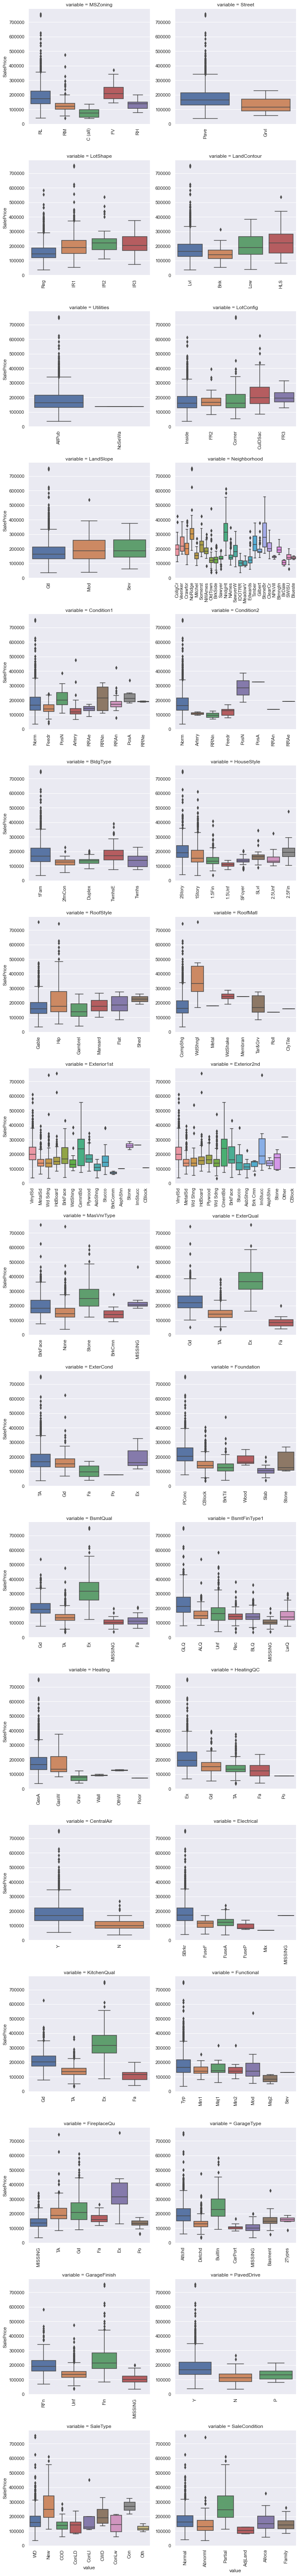

In [265]:
for c in qualitative:
    housing[c] = housing[c].astype('category')
    if housing[c].isnull().any():
        housing[c] = housing[c].cat.add_categories(['MISSING'])
        housing[c] = housing[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(housing, id_vars=['SalePrice'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "SalePrice")

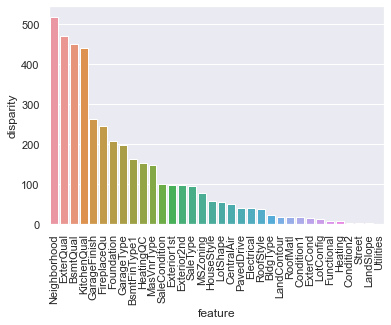

In [266]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(housing)
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

Above shows the affecting variables are 
 Neighbourhood ExterQualit Basement Quality KitchenQuality

In [267]:
housing.shape

(1460, 70)

In [268]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   Utilities      1460 non-null   category
 9   LotConfig      1460 non-null   category
 10  LandSlope      1460 non-null   category
 11  Neighborhood   1460 non-null   category
 12  Condition1     1460 non-null   category
 13  Condition2     1460 non-null   category
 14  BldgType       1460 non-null   category
 15  HouseStyle     1460 non-null   category
 16  OverallQual    1460 non-null   int64   
 17  OverallCond    1460 non-null   in

In [269]:
housing['LotFrontage'].fillna('0', inplace = True)

housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [270]:
#Prep data

housing_1 = housing

housing_1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [271]:
y = housing_1['SalePrice']

In [272]:
housing_1.drop(['SalePrice'],axis=1,inplace=True)

In [273]:
housing_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1460 non-null   object  
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   Utilities      1460 non-null   category
 9   LotConfig      1460 non-null   category
 10  LandSlope      1460 non-null   category
 11  Neighborhood   1460 non-null   category
 12  Condition1     1460 non-null   category
 13  Condition2     1460 non-null   category
 14  BldgType       1460 non-null   category
 15  HouseStyle     1460 non-null   category
 16  OverallQual    1460 non-null   int64   
 17  OverallCond    1460 non-null   in

In [274]:
#dummies for categorical 

housing_categorical = housing_1.select_dtypes(include=['category'])
housing_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Y,SBrkr,Gd,Typ,MISSING,Attchd,RFn,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Y,SBrkr,TA,Typ,TA,Attchd,RFn,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,Y,WD,Normal


In [275]:
housing_dummies = pd.get_dummies(housing_categorical)
housing_dummies.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [276]:
# Dropping categorical ones

housing_1 = housing_1.drop(list(housing_categorical.columns),axis=1)

In [277]:
housing_1.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,655,0,...,836,192,84,0,0,0,0,0,12,2008


In [278]:
# concat dummy variables with housing dataset
housing_1 = pd.concat([housing_1, housing_dummies], axis=1)

In [279]:
housing_1.head(1400)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,706,0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,978,0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,486,0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,216,0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,1396,60,88.0,12665,8,5,2005,2006,0,0,...,0,0,0,1,0,0,0,0,1,0
1396,1397,20,0,57200,5,5,1948,1950,353,334,...,0,0,0,1,0,0,0,0,1,0
1397,1398,70,51.0,6120,5,8,1920,2004,0,0,...,0,0,0,1,0,0,0,0,1,0
1398,1399,50,60.0,7200,5,4,1950,1982,180,352,...,0,0,0,1,0,0,0,0,1,0


In [280]:
housing_1.info

<bound method DataFrame.info of         Id  MSSubClass LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60        65.0     8450            7            5   
1        2          20        80.0     9600            6            8   
2        3          60        68.0    11250            7            5   
3        4          70        60.0     9550            7            5   
4        5          60        84.0    14260            8            5   
...    ...         ...         ...      ...          ...          ...   
1455  1456          60        62.0     7917            6            5   
1456  1457          20        85.0    13175            6            6   
1457  1458          70        66.0     9042            7            9   
1458  1459          20        68.0     9717            5            6   
1459  1460          20        75.0     9937            5            6   

      YearBuilt  YearRemodAdd  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLw  \
0          20

In [281]:
# feature scaling

from sklearn.preprocessing import scale

cols = housing_1.columns
housing_1 = pd.DataFrame(scale(housing_1))
housing_1.columns = cols
housing_1.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=257)

In [282]:
# test and train data split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(housing_1, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [283]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [284]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.003,0,20]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.003, 0, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [285]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006244,0.001866,0.002218,0.000646,0.0001,{'alpha': 0.0001},-17452.970299,-20854.291354,-21377.417726,-17962.835612,...,-19292.652393,1559.823349,6,-12231.662425,-11894.531155,-12415.995019,-12504.589773,-12074.960035,-12224.347681,221.997048
1,0.005859,0.001104,0.001950,0.000232,0.0005,{'alpha': 0.0005},-17452.961507,-20854.278079,-21377.381869,-17962.791351,...,-19292.621469,1559.823933,5,-12231.655078,-11894.525578,-12415.986189,-12504.588526,-12074.956765,-12224.342427,221.997258
2,0.005698,0.000842,0.001883,0.000117,0.001,{'alpha': 0.001},-17452.950518,-20854.261483,-21377.337047,-17962.736028,...,-19292.582815,1559.824662,4,-12231.645895,-11894.518607,-12415.975152,-12504.586968,-12074.952677,-12224.335860,221.997520
3,0.004587,0.000577,0.001836,0.000184,0.005,{'alpha': 0.005},-17452.862610,-20854.128738,-21376.978498,-17962.293504,...,-19292.273617,1559.830501,2,-12231.572438,-11894.462842,-12415.886860,-12504.574499,-12074.919969,-12224.283322,221.999618
4,0.005529,0.001095,0.002038,0.000129,0.003,{'alpha': 0.003},-17452.906564,-20854.195107,-21377.157765,-17962.514752,...,-19292.428207,1559.827580,3,-12231.609165,-11894.490724,-12415.931004,-12504.580735,-12074.936324,-12224.309590,221.998568


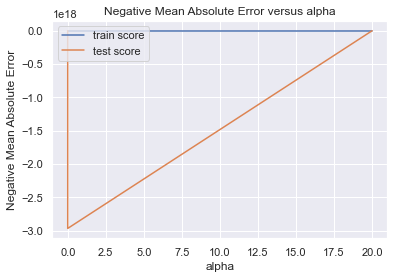

In [286]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error versus alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [287]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=20)

In [288]:
from sklearn.metrics import r2_score

In [289]:
y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.9433910361562493

In [304]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.9433910361562493

In [290]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.9485794219372388

In [291]:
# verify values for diff alpha  
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)


0.9439391602078518

In [292]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.9497142346960479

In [293]:
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.9441262515842267

In [294]:
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.9502017056669303

In [295]:
alpha = 1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.9442009339463613

In [296]:
alpha = 1
ridge = Ridge(alpha=alpha)
ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.95046866551169

Ridge regression is performing good at alpha and resulting in good R2

In [297]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


/Users/sudheendragogi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.822e+10, tolerance: 5.301e+08
  model = cd_fast.enet_coordinate_descent(
/Users/sudheendragogi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.661e+10, tolerance: 4.851e+08
  model = cd_fast.enet_coordinate_descent(
/Users/sudheendragogi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.003, 0, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [298]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.298270,0.032272,0.002535,0.000403,0.0001,{'alpha': 0.0001},-17454.065224,-20975.425625,-21407.237677,-17727.597655,...,-19281.006348,1633.191573,6,-12231.664095,-11894.532392,-12415.997115,-12504.590204,-12074.960830,-12224.348927,221.997055
1,0.307355,0.022747,0.002309,0.000217,0.0005,{'alpha': 0.0005},-17454.064393,-20975.401063,-21407.273012,-17727.555334,...,-19280.967365,1633.212679,5,-12231.663431,-11894.531763,-12415.996666,-12504.590680,-12074.960729,-12224.348654,221.997294
2,0.263539,0.019194,0.002139,0.000077,0.001,{'alpha': 0.001},-17454.063354,-20975.370360,-21407.317181,-17727.502433,...,-19280.918637,1633.239064,4,-12231.662600,-11894.530977,-12415.996106,-12504.591276,-12074.960603,-12224.348312,221.997593
3,0.285811,0.015820,0.002206,0.000114,0.005,{'alpha': 0.005},-17454.055042,-20975.124010,-21407.670531,-17727.079282,...,-19280.528278,1633.450231,2,-12231.655954,-11894.524788,-12415.991625,-12504.595401,-12074.958455,-12224.345245,221.999945
4,0.276894,0.017764,0.002348,0.000107,0.003,{'alpha': 0.003},-17454.059198,-20975.247112,-21407.493856,-17727.290828,...,-19280.723515,1633.344586,3,-12231.659277,-11894.527892,-12415.993866,-12504.593658,-12074.960048,-12224.346948,221.998777


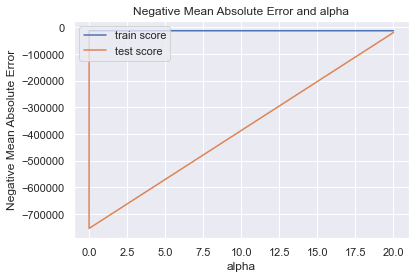

In [299]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [300]:
alpha =20

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

/Users/sudheendragogi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.449e+08, tolerance: 6.381e+08
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=20)

In [301]:
alpha =20

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

/Users/sudheendragogi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.449e+08, tolerance: 6.381e+08
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=20)

In [302]:
y_train_pred=lasso.predict(X_train)
r2_score(y_train,y_train_pred)

0.9441374042885247

In [303]:
alpha =20

lasso = Lasso(alpha=alpha)

lasso.fit(X_test, y_test)

y_test_pred=lasso.predict(X_test)
r2_score(y_test,y_test_pred)

0.9503910360942309

We observed that both Lasso and Ridge are giving good results, we can choose either of the models. We will select Lasso model for this exercise

The below mentioned variables are significant in predicting the price
LotArea------------- Lot size in square feet
OverallQual--------Rates the overall material and finish of the house
OverallCond-------Rates the overall condition of the house
YearBuilt-------- ---Original construction date
BsmtFinSF1-------Type 1 finished square feet
TotalBsmtSF------Total square feet of basement area
GrLivArea----------Above grade (ground) living area square feet
TotRmsAbvGrd---Total rooms above grade (does not include bathrooms)
Street_Pave-------Pave road access to property
RoofMatl_Metal--Roof material_Metal

Lassso 

R2 (train)- 0.9441374042885247, test- 0.9503910360942309

ridge-

R2 (train)- 0.9442009339463613, test-  0.95046866551169
